# 1. CustomerData로 K-means clustering 실습
### 제품 포트폴리오와 지역의 관계를 알아보자

(* 제품 포트폴리오: 회사가 생산하는 품목군을 나타내는 둘 이상의 제품 그룹)

CustomerData.xls
- Customer ID: 고객 ID로 각 고객을 구분해주는 유니크한 값
- ItemsBought: 팔린 개수 
- ItemsReturned: 환불 발생 개수
- ZipCode: 지역 코드
- Product: 물품 고유 번호

In [1]:
#공통 모듈
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

%matplotlib inline

#### 1-1. 'CustomerData.csv'를 읽어와 cd에 저장하시오.

In [2]:
cd=pd.read_csv("CustomerData.csv")

#### 1-2. HR 데이터의 상위 5개의 행과 하위 5개의 행을 통해 데이터가 제대로 불러와 졌는지 확인하시오.

In [3]:
cd.head(5)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


In [4]:
cd.tail(5)

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
8,14,9,9,8,2435
9,15,36,7,2,1764
10,16,42,1,1,1547
11,17,46,1,1,1265
12,21,41,22,9,2465


#### 1-3. ItemsBought과 ItemsReturned의 특정 단위를 같게하는 데이터 정규화작업을 진행하시오.
- 데이터분석 시 원본 데이터는 변형하지 않는 것이 좋다. 따라서, 전처리는 원본 데이터를 복사하여 생성한 데이터로 진행하라.(이름은 자유롭게 지정)   
- MinMaxScaler()를 이용해 정규화를 진행한다.
- 정규화 과정에 쓰이는 MinMaxScaler()는 사이킷런의 preprocessing 패키지에 있다.

In [5]:
# 정규화 작업을 위한 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler

In [6]:
# 원본 데이터 복사 후 전처리 진행
cd_copy = cd.copy()

In [7]:
# 전처리 - 정규화(:fit_transform)
scaler=MinMaxScaler()
scaler.fit(cd_copy)

MinMaxScaler()

##### 뒤에서 사용하기 위해 전처리한 데이터를 cd_copy2에 복사하시오.

In [8]:
# 전처리된 데이터 복사 
cd_copy2 = cd_copy.copy()

#### 1-4.  사이킷런의 KMeans를 활용하여 위의 데이터를 fit 하시오.   
n_clusters=3, init='k-means++', max_iter=300,random_state=0

In [29]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(cd_copy)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

#### 1-5. visualize_silhouette() 함수를 활용해 실루엣 계수를 시각화하고, k가 2, 3, 4, 5, 6일 때, 군집화를 가장 잘 나타내는 k값을 선택하고, 이유를 설명하시오.

In [36]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

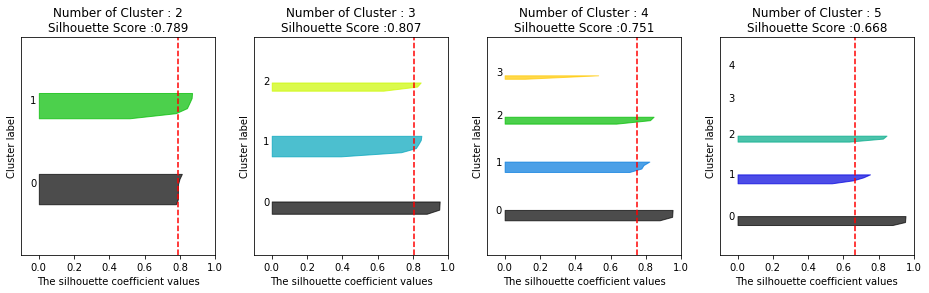

In [37]:
visualize_silhouette([ 2, 3, 4, 5],cd_copy)

#### 1-6. 위에서 선택한 k값으로 다시 피팅하고, 군집별 평균 실루엣 계수 값을 구하시오.  

In [38]:
# k=3으로 다시 피팅하기.
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(cd_copy)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

##### 1) cd_copy에 cluster 결과 칼럼 추가하시오

In [39]:
cd_copy['cluster'] = kmeans.labels_

##### 2) 개별 데이터의 실루엣 계수 값을 구한 후, cd_copy에 실루엣 계수 컬럼 추가하시오

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(cd_copy, cd_copy['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)


cd_copy['silhouette_coeff'] = score_samples

silhouette_samples( ) return 값의 shape (13,)


##### 3) 모든 데이터의 평균 실루엣 계수 값 구하시오

In [43]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(cd_copy, cd_copy['cluster'])
print('Silhouette Analysis Score:{0:.3f}'.format(average_score))

cd_copy.head(3)

Silhouette Analysis Score:0.807


,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product,cluster,silhouette_coeff
0,4,45,10,2,1365,1,0.844656
1,5,42,18,5,2764,2,0.632069
2,6,50,0,1,1343,1,0.847772


##### 4) 군집별 평균 실루엣 계수 값을 구하시오

#### 1-7. 사이킷런의 MeanShift를 활용하여 위에서 복사한 cd_copy2 데이터를 fit 하시오.   
bandwidth=0.8

In [26]:
from sklearn.cluster import MeanShift

analyzer = MeanShift(bandwidth=0.8)
analyzer.fit(cd_copy2)

MeanShift(bandwidth=0.8)

#### 1-8. estimate_bandwidth()를 사용해 최적의 bandwidth 값을 구하시오.

In [27]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(cd_copy2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 108.601


#### 1-9. 최적의 bandwidth를 평균 이동 입력값으로 적용해 다시 fit하고, cluster labels 유형을 확인하시오.

In [28]:
best_bandwidth = estimate_bandwidth(cd_copy2)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(cd_copy2)
print('cluster labels 유형:',np.unique(cluster_labels)) 

cluster labels 유형: [0 1 2 3 4]


# 2. Supermarket Customer Data를 활용한 DBSCAN 실습
Mall_Customers.csv 데이터

- Customer ID
- Age
- Genre: 고객 성별 (Gender) 
- Annual income (k$) 
- Spending score(1-100) : assigned based on parameters like customer behavior and purchasing data

#### 2-1. 'Mall_Customers.csv' 데이터를 불러와 df에 저장하시오.

In [123]:
df = pd.read_csv('Mall_Customers.csv')

#### 2-2. df의 처음 다섯개 행을 확인하시오.

In [124]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2-3. info() 함수를 이용해 데이터프레임의 기본 정보를 확인하시오.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### 2-4.describe() 함수를 이용해 df의 정보를 확인하시오.

In [126]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 2-5. 칼럼의 이름을 rename 함수를 활용하여 바꾸시오.

Annual Income (k$) 는 Annual Income 으로, Spending Score(1-100)은 Spending Capability로 바꾸시오. 

바꾼 뒤, head()함수를 활용하여 확인하시오.

In [127]:
df.rename(columns = {'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Capability'},inplace=True)

In [128]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Capability
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 2-6. 아래의 코드를 돌려서 데이터 분포를 확인하시오.

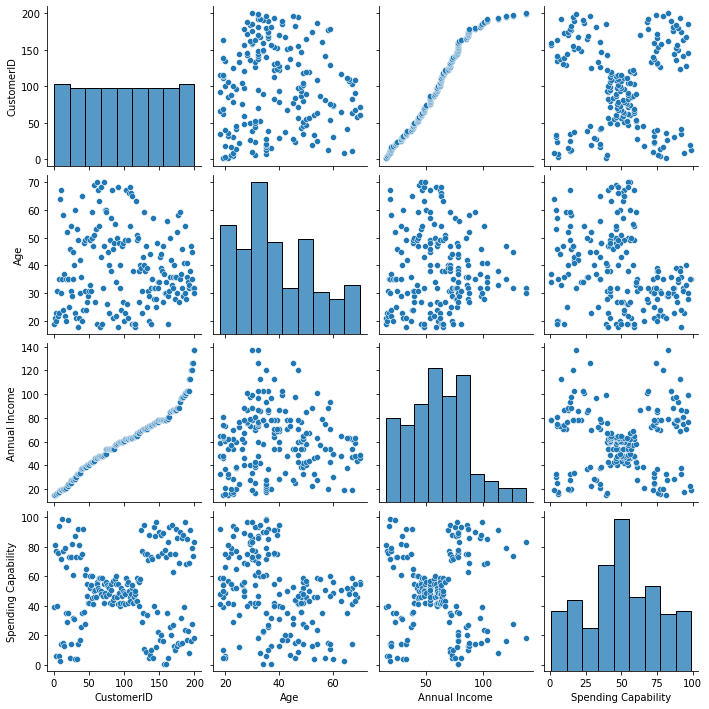

In [40]:
sns.pairplot(df)

#### 2-7. CustomerID 칼럼을 삭제한 뒤 확인하시오.

In [129]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [130]:
df.head()

,Genre,Age,Annual Income,Spending Capability
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### 2-8. iloc()함수를 사용하여 변수 x에 Annual Income 과 Speding Capability를 담으시오.

In [131]:
df.iloc[:,[2,3]]

,Annual Income,Spending Capability
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [132]:
x=df.iloc[:,[2,3]]

In [140]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Annual Income        200 non-null    int64
 1   Spending Capability  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


#### 2-9. 다음의 코드를 돌려, (200,2)가 출력되는지 확인하시오.

In [133]:
x.shape

(200, 2)

#### 2-10. 사이킷런의 DBSCAN을 활용하여 x를 fit하시오.

- eps=3
- min_samples=4
- metric='euclidean'

In [134]:
from sklearn.cluster import DBSCAN

In [135]:
db=DBSCAN(eps=3, min_samples=4, metric='euclidean')

#### 2-11.labels_을 출력하여 확인하시오.

In [136]:
labels_=db.fit_predict(x)
print(labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0 -1  0 -1 -1
  0 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  1  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  3
  3 -1  3 -1 -1  4 -1 -1 -1  4  5  4 -1  4  5 -1  5  4 -1  4  5 -1 -1  6
 -1 -1 -1  7 -1  6 -1  6 -1  7 -1  6 -1  7 -1  7 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  8 -1  8 -1  8 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


#### 2-12. 다음의 코드를 실행하여 DBSCAN의 결과를 확인하시오.

In [137]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

In [138]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s= 50, c= 'pink')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s= 50, c= 'yellow')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s= 50, c= 'cyan')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s= 50, c= 'magenta')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s= 50, c= 'orange')
plt.scatter(x[y_means == 5,0], x[y_means == 5,1], s= 50, c= 'blue')
plt.scatter(x[y_means == 6,0], x[y_means == 6,1], s= 50, c= 'red')
plt.scatter(x[y_means == 7,0], x[y_means == 7,1], s= 50, c= 'black')
plt.scatter(x[y_means == 8,0], x[y_means == 8,1], s= 50, c= 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending score from 1-100')
plt.title('Clusters of data')
plt.show()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 0)' is an invalid key

# 3 make_circles( )로 DBSCAN 적용하기 

#### 3-1.아래 함수를 실행하시오<br/>클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수 

In [101]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

#### 3-2.make_circles( ) 함수를 이용해 내부 원과 외부 원 형태로 된 2차원 데이터 세트를 생성하시오(n_samples=1000, noise=0.03, factor=0.5)

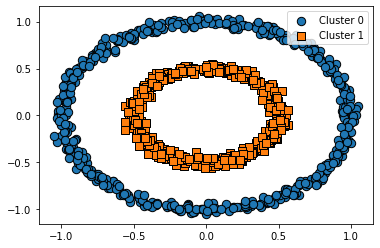

In [102]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

#### 3-3 KMeans로 make_circles() 데이터 셋을 클러스터링 수행하시오(n_cluster=2, random_state=0)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


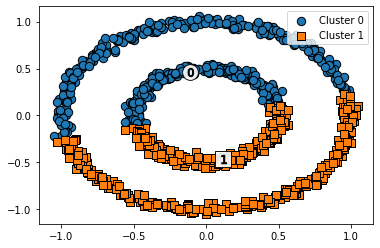

In [106]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

#### 3-4 GMM로 make_circles() 데이터 셋을 클러스터링 수행하시오(n_components=2, random_state=0)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


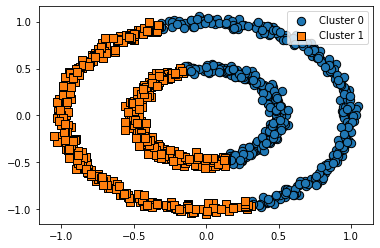

In [107]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

#### 3-5 DBSCAN로 make_circles() 데이터 셋을 클러스터링 수행하시오

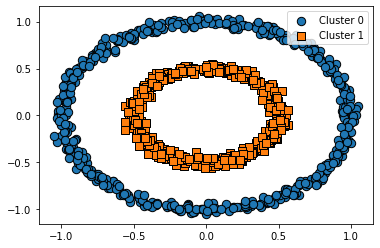

In [108]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## 4. 베이즈가우시안 혼합 모델 실습
- 2번에서 사용한 데이터 사용

#### 4-1. x를 clusterDF 데이터프레임으로 저장하시오.
- columns=['ftr1', 'ftr2'] (교재 코드 참고)

In [113]:
clusterDF=pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])

In [116]:
clusterDF.head(5)

,ftr1,ftr2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


#### 4-2. 사이킷런의 베이즈가우시안 혼합 모델을 활용하여 x를 fit하시오.
- n_components=20, random_state=33

C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\82106\AppData\Local\Temp/ipykernel_9976/3102501208.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\


IndexError: list index out of range

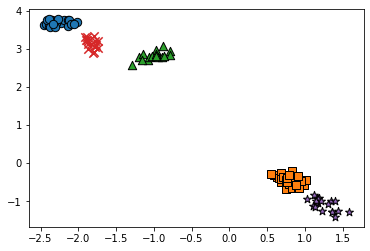

In [110]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=20, random_state=33)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

#### 4-3. 불필요한 클러스터의 가중치를 0으로 잘 처리했는지 확인하시오.

#### 4-4. 다음의 코드를 실행하여 visualize_cluster_plot 함수를 만들고 군집화 결과를 시각화하시오.
- fit 결과를 clusterDF에 'bgm_label'로 추가

In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd', '8', 'D']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

## 5. 가우시안 혼합모델 실습
- 올리베티 얼굴 데이터셋: 사람 40명의 얼굴 이미지 데이터 (인당 10장씩)

In [141]:
#돌려주시면 됩니다!

#데이터셋 불러오기
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#계층적 샘플링으로 데이터 나누기
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\82106\scikit_learn_data


#### 5-1. pca 모듈로 X_train 분산을 99% 로 줄여주세요.

In [143]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)

#### 5-2. AIC, BIC 점수를 비교해 사이킷런의 GaussianMixture 모듈의 최적의 클러스터 개수를 찾아보겠습니다.
- n_component를 1부터 15까지로 하여 각 클러스터 개수별 AIC, BIC 점수를 구하고 이를 plot으로 나타내세요.
- random_state=33

In [151]:
from sklearn.mixture import GaussianMixture

k_range = range(1, 15)
gm_per_k = []
for k in k_range:
    print("k={}".format(k))
    gm = GaussianMixture(n_components=k, random_state=33).fit(X_train_pca)
    gm_per_k.append(gm)
gm.fit(X)

k=1
k=2


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=3
k=4


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=5
k=6


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=7


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=8


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=9


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=10


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=11


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=12


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=13


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


k=14


C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\82106\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


GaussianMixture(n_components=14, random_state=33)

In [152]:
gm.bic(X)
gm.aic(X)

1599.753380459329

#### 5-3. 최적 n_component 값을 넣어 gmm을 fit 시키고 알고리즘이 수렴했는지 확인해보세요.